# The four popular methods :

## apply
## map
## applymap
## replace

In [10]:
#lets start with the first one

#apply method work on both series and dataframe

import pandas as pd

result={
    "Name":["Operating Systems","Machine Learning","Data Science","Artificial Neural Network","Computer Vision"],
    "Marks":[98,98,96,85,97],
    "Grades":["S","S","A","S","A"]
}

result=pd.DataFrame(result)
result

,Name,Marks,Grades
0,Operating Systems,98,S
1,Machine Learning,98,S
2,Data Science,96,A
3,Artificial Neural Network,85,S
4,Computer Vision,97,A


In [11]:
result['Name'].apply(len)

0    17
1    16
2    12
3    25
4    15
Name: Name, dtype: int64

So here we can see, it is returning the length of each element in Name column , so it is quite useful in filtering data.

lets say if I want ignore those names whose length > 15'

Lets run and watch this !

In [12]:
(result['Name'].apply(len)>15)


0     True
1     True
2    False
3     True
4    False
Name: Name, dtype: bool

In [13]:
result.apply(pd.Series.min)

Name      Artificial Neural Network
Marks                            85
Grades                            A
dtype: object

This apply method takes any user defined function 

## applymap()

In [14]:
result.applymap(len)

TypeError: object of type 'int' has no len()

### the above is error because int object dontb have len method however if we define a new dataset having all strings and then write applymap function then lets see how its working 

In [24]:
df ={
    "Name":["Anish","Aryan","Anvi","Atul"],
    "Sex" : ["Male","Male","Female","Male"],
    "Employed":["Yes","No","No","Yes"],
    "Travel":["Yes","Yes","Yes","Yes"]
}

df=pd.DataFrame(df)
df

,Name,Sex,Employed,Travel
0,Anish,Male,Yes,Yes
1,Aryan,Male,No,Yes
2,Anvi,Female,No,Yes
3,Atul,Male,Yes,Yes


In [23]:
# so here we can see what is difference between apply and applymap, applymap is giving the length of each column
#so we can say it only works on only dataframe

## First major difference: DEFINITION

1) map --->  is defined on Series ONLY

2) applymap ---> is defined on DataFrames ONLY

3) apply --->  is defined on BOTH

## Second major difference: INPUT ARGUMENT

1) map accepts dicts, Series, or callable

2) applymap and apply accept callables only

## Third major difference: BEHAVIOR

1) map is elementwise for Series

2) applymap is elementwise for DataFrames

3) apply also works elementwise but is suited to more complex operations and aggregation. The behaviour and return value depends on the function.

## Fourth major difference (the most important one): USE CASE

1) map is meant for mapping values from one domain to another, so is optimised for performance 

(e.g., df['A'].map({1:'a', 2:'b', 3:'c'}))

2) applymap is good for elementwise transformations across multiple rows/columns

(e.g., df[['A', 'B', 'C']].applymap(str.strip))

3) apply is for applying any function that cannot be vectorised

(e.g., df['sentences'].apply(nltk.sent_tokenize)).

In [25]:
df.apply(len)

Name        4
Sex         4
Employed    4
Travel      4
dtype: int64

In [28]:
df.applymap(len)

,Name,Sex,Employed,Travel
0,5,4,3,3
1,5,4,2,3
2,4,6,2,3
3,4,4,3,3


In [30]:
df.map(len)

AttributeError: 'DataFrame' object has no attribute 'map'

### In above three ecxample we can see, we are passing the function len , apply is accepting that function and giving the length of all columns only . on the other hand applymap(len) is accepting function len and giving length of each element in the dataset. However, map is throwing error just because map is used for mapping 

In [31]:
df['Sex'].map(len)

0    4
1    4
2    6
3    4
Name: Sex, dtype: int64

Here we can see , if particularly act on a series then its returning the length of that particular series.

## map vs rename

In [34]:
df["Name"].map({"Anish":"Anand",
         "Aryan":"Shrivastava",
         "Anvi":"Srivastava"})

0          Anand
1    Shrivastava
2     Srivastava
3            NaN
Name: Name, dtype: object

In [35]:
df['Name'].replace({"Anish":"Anand",
         "Aryan":"Shrivastava",
         "Anvi":"Srivastava"})

0          Anand
1    Shrivastava
2     Srivastava
3           Atul
Name: Name, dtype: object

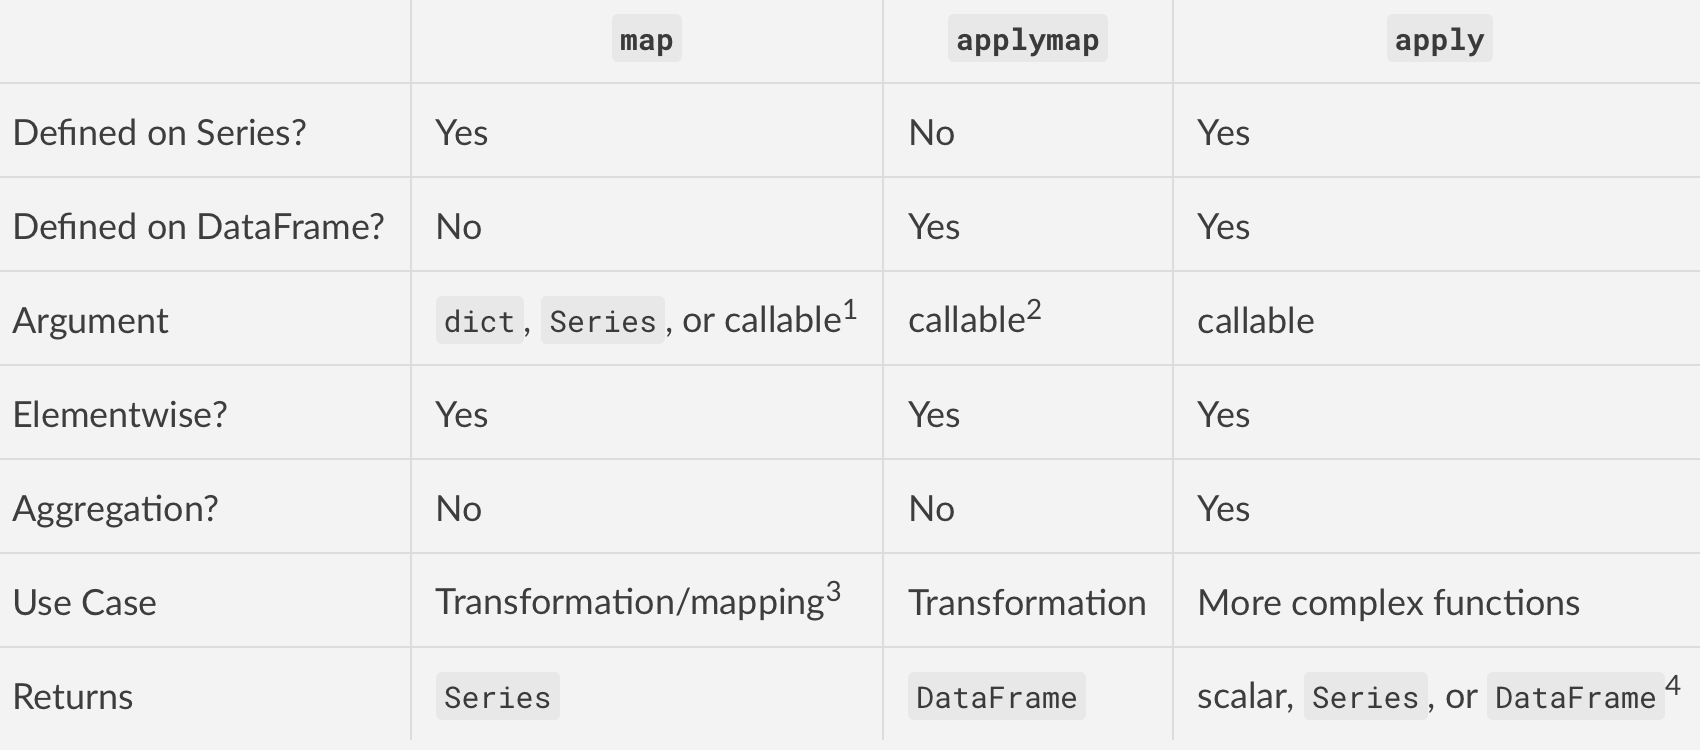